In [1]:
%load_ext autoreload
%autoreload 2

In [70]:
import resultcomp
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
directories= ['baseline', 'baseline_new', 'exploration_only', '20200331_155518', '20200401_144409']

In [113]:
snational, seast, swest = resultcomp.read_results(directories=directories)

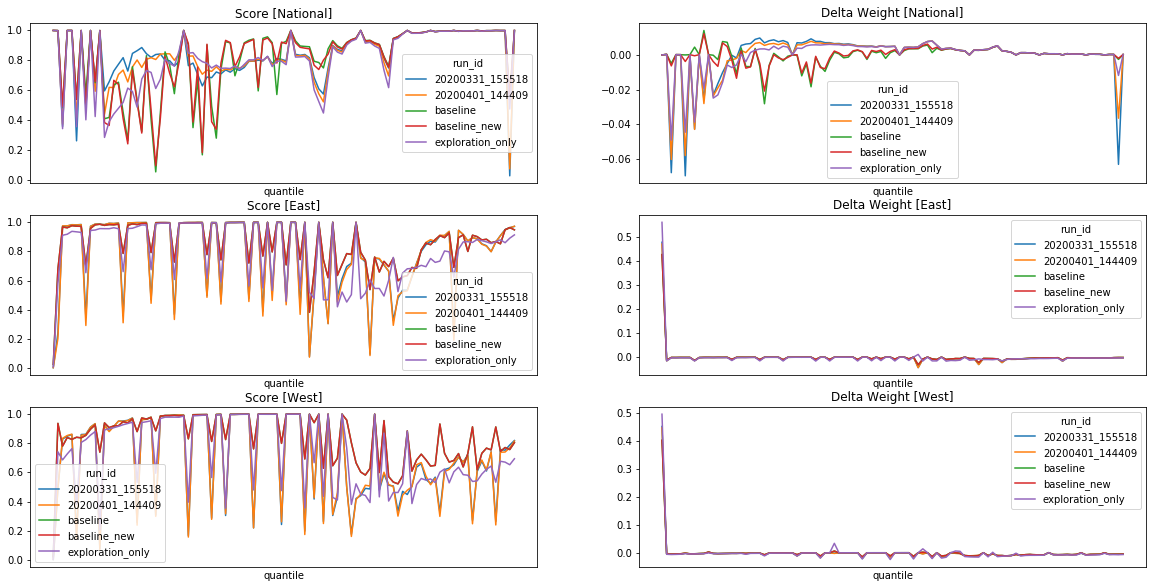

In [114]:
_ = resultcomp.plot_scores(snational, seast, swest)

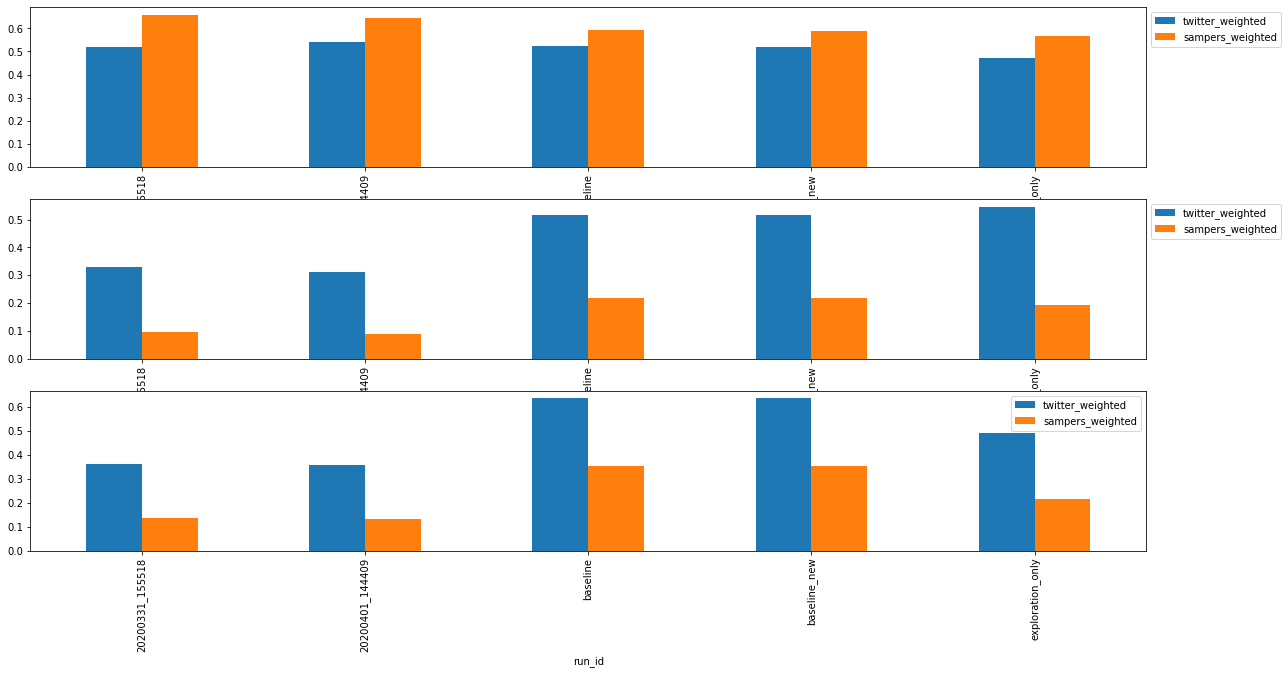

In [115]:
_ = resultcomp.plot_score_summary(snational, seast, swest)

In [116]:
seast

,,score,sampers_weight,twitter_weight
quantile,run_id,,,
"(-0.001, 3.211]",baseline,0.024247,6.803014e-01,2.541575e-01
"(3.211, 5.192]",baseline,0.381394,7.105888e-02,1.026429e-01
"(5.192, 6.939]",baseline,0.537589,4.137872e-02,6.367983e-02
"(6.939, 8.647]",baseline,0.753912,2.712395e-02,4.415972e-02
"(8.647, 10.313]",baseline,0.690017,2.320578e-02,3.539553e-02
...,...,...,...,...
"(277.455, 291.861]",20200401_144409,0.999999,2.727059e-07,8.060316e-06
"(291.861, 312.377]",20200401_144409,1.000000,1.784666e-07,3.933477e-06
"(312.377, 348.792]",20200401_144409,1.000000,7.081628e-08,2.208067e-06


In [117]:
dms = resultcomp.read_distance_metrics(directories=directories)

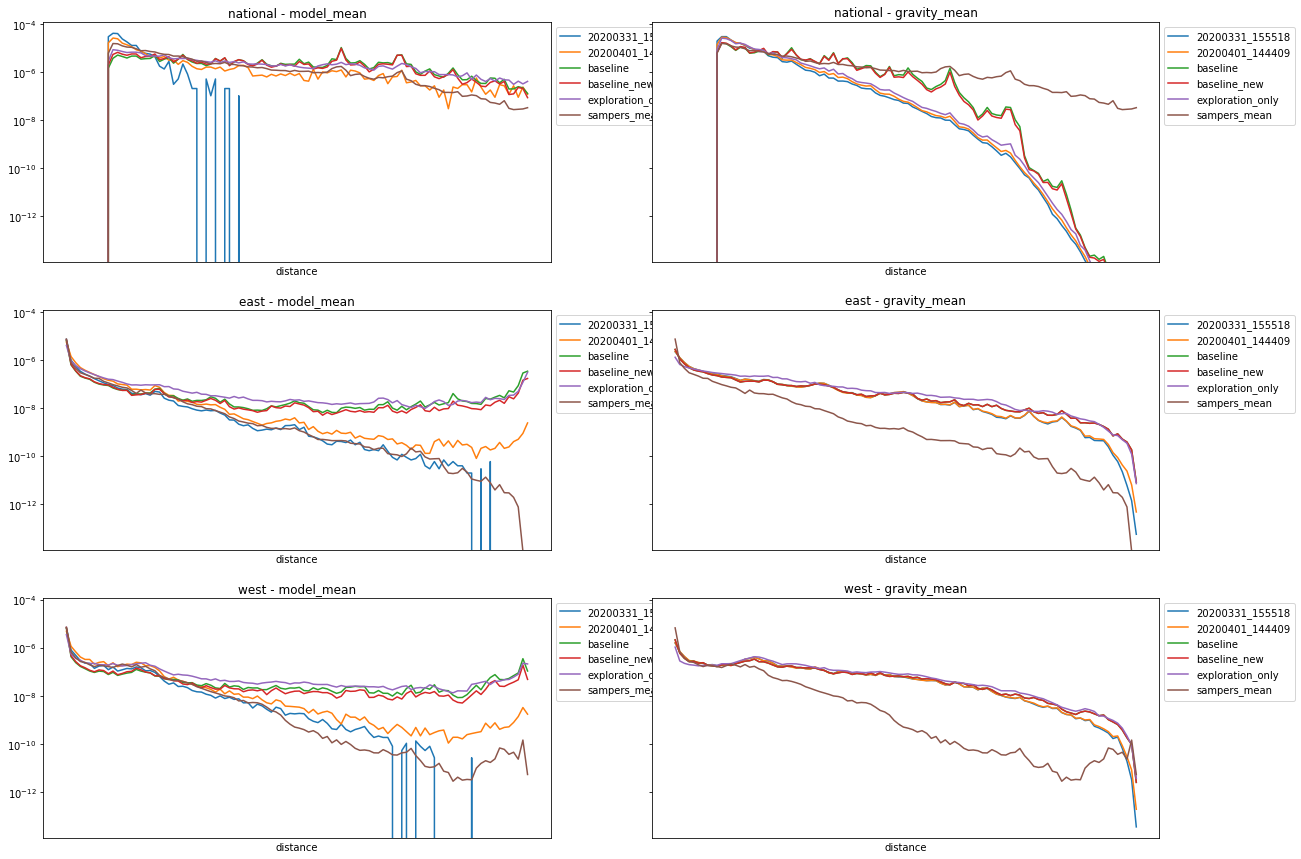

In [118]:
_ = resultcomp.plot_distance_metrics(dms)